# Natural Language processing: Hate speech classification

### Introduction
Hate speech is abusive or threatening speech that offends, insults, or threatens a group based on race, religion, ethnic origin, sexual orientation, sex, age or mental or physical disability. Hate speech can lead to hate crimes as well as harm feelings and cause harm to individuals’ self-esteem and self-worth. It can also lead to violence against groups because it creates an environment where people are encouraged to act violently towards others. In recent decades usage of internet has increased drastically where in early 90s, less than 3 millions of world population were using the internet where in recent years the number has grown by 1000 times to reach 3.4 billions in 2016 [1]. With the emerge of social media popularity and usage in the last 15 years when platforms such as Facebook, Instagram, Snapchat, Twitter and Tik-Tok, online hate speech, cynicism and cyberbullying has increased against different groups of people [2]. It has been estimated Facebook has around 2.85 billion active users monthly in 2021 [3]. With this tremendous number of users, it’s impossible to track all users’ activities for suspicious activities or follow up on online abuse or harassments reported by victim users not to mention language barrier. It’s impossible to have sufficient human resources to tackle these issues. Luckily machine learning and deep learning has become widely used in natural language processing and classification. And we have seen many applications in the recent years, from chatbots to text classifications and many others. Companies like Facebook who are in the social media domain have adopted ways to flag abusive language automatically without the need of human intervention and developed machine learning models and frameworks such as “Deep Entity Classification (DEC)”. [4]. 

Description of the selected dataset:

The dataset I have acquired consists of 46,000 tweets collected as part of the literature:

J. Wang, K. Fu and C. -T. Lu, "SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection," 2020 IEEE International Conference on Big Data (Big Data), 2020, pp. 1699-1708, doi: 10.1109/BigData50022.2020.9378065.[5]

The dataset is a collection of tweets that were taken between 10-13 December 2020. These tweets were then labeled as according to the cyberbullying form in the following categories:
- Age
- Ethnicity
- Gender
- Religion
- Other type of cyberbullying
- Not cyberbullying 

Each category contains approximately 8000 tweets. These tweets are short in nature and contain no more than 280 words as per twitters maximum limit on tweets.
The dataset has been annotated manually to the appropriate category based on the researcher’s best approximation that fitted the task they were solving. The Dataset can somehow be considered reliable, data are not missing any rows or columns and since the dataset was collected from a public source Twitter, it can be further verified if needed, however due to the nature of the dataset itself, it can be also verified objectively by scanning through the data itself. The dataset is closely relevant to the task we’re solving. Cyberbullying and hate speech could be used synonymously.


### Objectives: 

In this project we will set some specific requirements and issues to address:
•	Investigate whether the data fits the purpose of the study
•	Identify baseline metrics to be evaluated against 
•	Investigate whether the data is clean for our implementation
•	Preprocess the data by cleaning the data, lemmatizing it 
•	Implement 3 different machine learning models, logistic regression, naïve bayes and recurrent neural networks deep learning model
•	Evaluate the outcomes against the baseline benchmark

Supervised and unsupervised machine learning models can contribute to make the internet world a better place. ML models can be trained and developed to identify hate speech in social media posts, and other online media content. This can help identify and tackle hateful content. It can also be used to flag content for further review by human who can in their part for example help train the model by classifying it or taking actions or can help inform the development of policies and interventions to address hate speech.


### Evaluation methodology:

There are a variety of evaluation metrics that can be used to evaluate the performance of a hate speech classification model. Some common metrics include:  
•	Accuracy: percentage of texts that are correctly classified by the model. It is a simple and widely used metric, but it can be misleading if the dataset is imbalanced (e.g. if there are significantly more non-hate speech texts than hate speech texts). 
•	Precision: This is the percentage of texts that are correctly classified as hate speech by the model. It is a measure of the model's ability to avoid false positives (i.e. classifying non-hate speech texts as hate speech). 
•	Recall: This is the percentage of hate speech texts that are correctly classified by the model. It is a measure of the model's ability to avoid false negatives (i.e. classifying hate speech texts as non-hate speech). 
•	F1 score: This is the harmonic mean of precision and recall. It is a balanced metric that considers both precision and recall. 
•	Confusion matrix: This is a matrix that shows the number of true positives, true negatives, false positives, and false negatives produced by the model. It can be used to understand the model's strengths and weaknesses in more detail. 
•	Validation loss and loss: metric used in RNN to determine loss % in each iteration of deep learning

We will use a combination of metrics to evaluate the performance of a hate speech classification model, as different metrics can highlight different aspects of the model's performance. It is also important to consider the specific requirements of a model. For the RNN we will only use accuracy and loss as it’s not possible for me to generate data that can be evaluated against other metrics.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.utils import to_categorical
from collections import Counter









pd.options.display.max_colwidth = 300 # to display full tweets as each tweet is of 280 chars

In [2]:
df = pd.read_csv('hate_speech.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying


As we can see the dataset consist of two columns tweets and type of bullying we can now look into types 
of bullying in cyberbullying_type column in the next figure

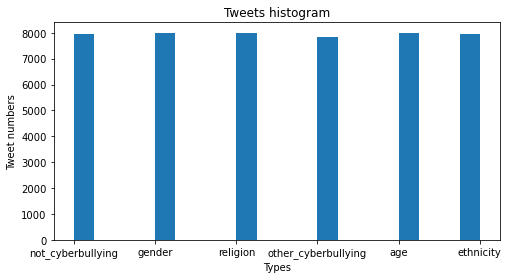

In [3]:
plt.figure(figsize=(8,4))
plt.hist(df.cyberbullying_type, bins=20)
plt.title("Tweets histogram")
plt.ylabel("Tweet numbers")
plt.xlabel("Types")
plt.show()

<AxesSubplot:ylabel='None'>

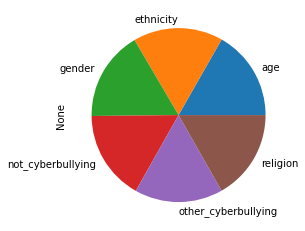

In [4]:
df.groupby('cyberbullying_type').size().plot(kind='pie')

We can see that the dataset is relatively balanced in terms of bullying types.

In [5]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

No null values in the dataset which means that we don't have to normalize null values.

We will use a label Encoder to target labels from 0-5 computers understand numbers.

In [6]:
 
# Creating a label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label and the encoder returns encoded label in numbers from 0-5
label = le.fit_transform(df['cyberbullying_type'])
  
# Appending the result to our dataFrame
# with column name 'target'
df["target"] = label

We can take a breif look of how the tweets look from a 10 randomly selected tweets!

In [7]:

df.iloc[10:20]['tweet_text']

10                                                                                                          @Jord_Is_Dead http://t.co/UsQInYW5Gn
11                                                                                              The Bully flushes on KD http://twitvid.com/A2TNP
12                                                                                                                                   Ughhhh #MKR
13    RT @Kurdsnews: Turkish state has killed 241 children in last 11 years http://t.co/JlvkE1epws  #news  ##GoogleÇeviriciTopluluğuKürtçeyideE…
14                         Love that the best response to the hotcakes they managed to film was a non-committal "meh" from some adolescent. #MKR
15                                                               @yasmimcaci @Bferrarii PAREM DE FAZER BULLYING COMIGO =( UHAHUAH BANDO DE PRETO
16                                                                       @sarinhacoral @Victor_Maggi tadinhu de mim , sofrendo bul

We can clearly see that the data is not clean at all and we will take few steps to cleen it

- remove the users from the tweets, users can be recognized by @ character 
- remove non-letter characters
- links and concurrent spaces
- convert all letters to small letters

In [8]:

def text_cleaner(tweet):
    tweet = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", tweet) # removes twitter user, links, nonwords
    tweet = re.sub(r"\W|\d", " ", tweet) 
    tweet = re.sub(r"[ ]{2,}", " ", tweet)  # removes occurances of more than one white space between words
    return tweet
    

In [9]:
df["tweet_text"]=df.tweet_text.apply(lambda x:text_cleaner(x))

We can still see that there are some non ASCII characters e.g., "GoogleÇeviriciTopluluğuKürtçeyid" we can apply 
a lamada function that eliminates characters that are not in standard ASCII

In [10]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

We can apply a lambada function that excludes any character that is not in the above list 
at the same time we can convert all letters to small letters by passing by applying .lower() method when passing
the tween to non_ascii_filter

In [11]:
def non_ascii_filter(tweet):
    # excludes any character that is not in ASCII
    return ''.join(filter(lambda x: x in set(string.printable), tweet)) 


In [12]:
df["tweet_text"]=df.tweet_text.apply(lambda x: non_ascii_filter(x.lower()))

In next cell we will lemmatize words and remove stop words at the same time in addition to tokenization

In [75]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = nltk.word_tokenize(text)
#     filtered_tokens = ' '.join(wordnet_lemmatizer.lemmatize(token) for token in tokens if token not in stop_words)
    filtered_tokens = [wordnet_lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return filtered_tokens
#This will create a new column called filtered tokens
df['filtered_tokens'] = df['tweet_text'].apply(remove_stop_words)

In [14]:
df.head()

,tweet_text,cyberbullying_type,target,filtered_tokens
0,in other words katandandre your food was crapilicious mkr,not_cyberbullying,3,"[word, katandandre, food, crapilicious, mkr]"
1,why is aussietv so white mkr theblock imacelebrityau today sunrise studio neighbours wonderlandten etc,not_cyberbullying,3,"[aussietv, white, mkr, theblock, imacelebrityau, today, sunrise, studio, neighbour, wonderlandten, etc]"
2,a classy whore or more red velvet cupcakes,not_cyberbullying,3,"[classy, whore, red, velvet, cupcake]"
3,meh p thanks for the heads up but not too concerned about another angry dude on twitter,not_cyberbullying,3,"[meh, p, thanks, head, concerned, another, angry, dude, twitter]"
4,this is an isis account pretending to be a kurdish account like islam it is all lies,not_cyberbullying,3,"[isi, account, pretending, kurdish, account, like, islam, lie]"


In [15]:
# We will create pd series for labels and targets
X = df.filtered_tokens.values
y = df.target.values

In [23]:
" ".join((X[0]))

'word katandandre food crapilicious mkr'

## Logistic regression

In the first step of our supervised learning, we will implement a supervised machine learning model 
using Count vector and logistic regression. 



In [55]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [56]:
# Vectorization using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)
X_test  = vectorizer.transform(x_test)

After vectorizing the features, we can now feed that information in addition to the target
to a Logistic Regression classifier that we imported earlier from Sklearn library

In [57]:

classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8220344367494758


We have gotten accuracy of 82 however we need more information and perhaps a visualization 

so let's calculate f1 score, precision, recall and plot a confusion matrix 

In [58]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Convert the predictions to class labels
# y_pred = y_pred.argmax(axis=1)

# # Calculate the F1 score and confusion matrix
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(report)
print(confusion)
# len(test.cyberbullying_type)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2620
           1       0.99      0.97      0.98      2671
           2       0.91      0.82      0.86      2649
           3       0.58      0.57      0.57      2622
           4       0.57      0.65      0.61      2549
           5       0.96      0.93      0.95      2628

    accuracy                           0.82     15739
   macro avg       0.83      0.82      0.82     15739
weighted avg       0.83      0.82      0.83     15739

[[2549    1    6   32   30    2]
 [   4 2600   14   18   32    3]
 [   6   10 2181  199  244    9]
 [  58   10   81 1492  913   68]
 [  17   10  109  733 1664   16]
 [   1    4   15  115   41 2452]]


We can use a plot to better visualize the confusion matrix

In [59]:

#we iterate from 0 to 5 and append the returned string from cyberbullying_type column to classes list
#that we will pass as an argument to plot_confusion_matrix

classes = []
for i in range (6):
    class_name = df.loc[df['target'] == i, 'cyberbullying_type'].iloc[0]
    classes.append(class_name)

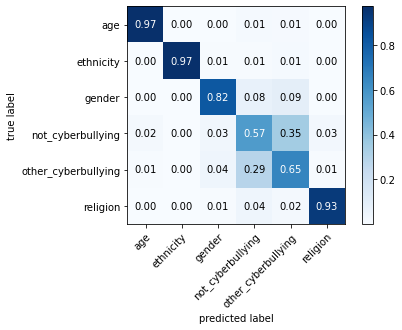

In [60]:
figure, ax = plot_confusion_matrix(conf_mat = confusion,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

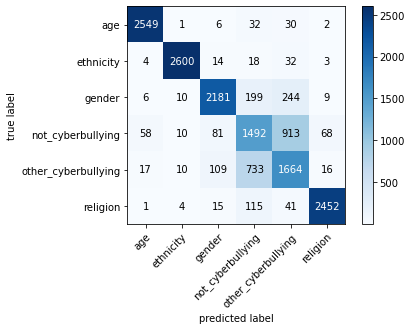

In [61]:
figure, ax = plot_confusion_matrix(conf_mat = confusion,class_names = classes,colorbar = True)
plt.show()

## Multinomial Naїve Bayes

In this section we will analayze the same data using Multinomia Naïve Bayes implementation.

In [39]:
#first we download word2vector embedding corpus
nltk.download('word2vec_sample')

[nltk_data] Downloading package word2vec_sample to
[nltk_data]     /Users/user/nltk_data...
[nltk_data]   Package word2vec_sample is already up-to-date!


True

In [50]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=0)

In [65]:
y_train[0]

0

In [64]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [67]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [70]:
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(report)
print(confusion)

              precision    recall  f1-score   support

           0       0.68      0.98      0.80      2620
           1       0.83      0.93      0.87      2671
           2       0.80      0.83      0.82      2649
           3       0.68      0.35      0.47      2622
           4       0.62      0.39      0.48      2549
           5       0.79      0.96      0.87      2628

    accuracy                           0.74     15739
   macro avg       0.73      0.74      0.72     15739
weighted avg       0.73      0.74      0.72     15739

[[2577   11    7    5    5   15]
 [  90 2472    8    6   16   79]
 [  70   96 2198  118   88   79]
 [ 512  148  214  929  509  310]
 [ 521  247  287  288 1004  202]
 [  31   11   28   17    5 2536]]


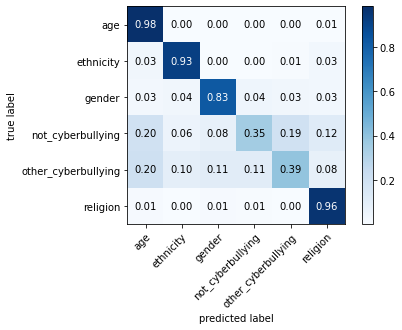

In [71]:
figure, ax = plot_confusion_matrix(conf_mat = confusion,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()

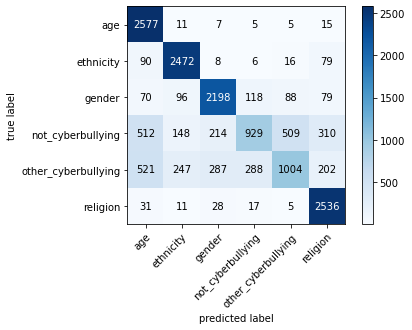

In [72]:
figure, ax = plot_confusion_matrix(conf_mat = confusion,class_names = classes,colorbar = True)
plt.show()

The results seem to be following a similar pattern however it's scored less accurate than the logistic 
regression in tweets that are not hate speech or categorized under other cyberbullying.

## Deep learning 

In the last section of our classification approach we will implement a classification using neural network 
using tensorflow 

Before we add our data to pipeline we need to put the tweet text words in a list so we will reuse a function
we define earlier and reprocess the data accordingly 

In [82]:
x_train,x_test,y_train,y_test = train_test_split(df[['filtered_tokens']],df['target'])

In [83]:
vocabulary = Counter() # it creats vocabulary list with word count
def add_to_vocabulary(tweet):
    global vocabulary
    vocabulary.update(tweet)

In [85]:
x_train.filtered_tokens.apply(add_to_vocabulary)
df.filtered_tokens.apply(add_to_vocabulary)
vocabulary_size = len(vocabulary)
vocabulary_size
vocabulary.most_common(10)

[('school', 16078),
 ('fuck', 10625),
 ('like', 10489),
 ('nigger', 9872),
 ('girl', 9703),
 ('joke', 9621),
 ('u', 9426),
 ('dumb', 9355),
 ('bully', 9312),
 ('high', 8951)]

In [86]:
tokenizer = tf.keras.preprocessing.text.Tokenizer() # word tokenizer
tokenizer.fit_on_texts(x_train.filtered_tokens)
X_train = tokenizer.texts_to_sequences(x_train.filtered_tokens)
X_test = tokenizer.texts_to_sequences(x_test.filtered_tokens)

In [88]:
#this will calculate the max length of a tweet in order to create padding for the rest of vectors 
#in order to balance vectors to the max by filling them with zeroes.
max_size = len(max(df.filtered_tokens,key=lambda x:len(x)))
max_size

404

In [89]:
X_train = tf.keras.utils.pad_sequences(X_train, maxlen=max_size, padding='post')

In [90]:
X_test = tf.keras.utils.pad_sequences(X_test, maxlen=max_size, padding='post')

In [91]:
# this will transform the scalar values of our targets that are numbers 0-5 to 
#categorical values that go along with the dimension of our tensorflow input
enc = OrdinalEncoder()
y_train,y_test = to_categorical(enc.fit_transform(X=y_train.to_frame()),num_classes=6),to_categorical(enc.fit_transform(X=y_test.to_frame()),num_classes=6)

In [99]:
#here we create and compile our deep learning model 
#we add multi layers starting by embedding and ending with compilation
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocabulary_size, 100, input_length=max_size))
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)))
model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model = define_model(vocab_size,max_size)

In [100]:
model.fit(X_train, y_train, epochs=3, validation_split= 0.2)

Epoch 1/3
895/895 [==============================] - 55s 60ms/step - loss: 0.6934 - accuracy: 0.6992 - val_loss: 0.4359 - val_accuracy: 0.8128
Epoch 2/3
895/895 [==============================] - 51s 57ms/step - loss: 0.3571 - accuracy: 0.8560 - val_loss: 0.4480 - val_accuracy: 0.8172
Epoch 3/3
895/895 [==============================] - 52s 58ms/step - loss: 0.2403 - accuracy: 0.9068 - val_loss: 0.4964 - val_accuracy: 0.8155


In [101]:
y_pred = model.evaluate(X_test, y_test)

373/373 [==============================] - 2s 6ms/step - loss: 0.5182 - accuracy: 0.8115


### Baseline performance and models evaluation:

By basing my outcomes against outcomes in the literature “Using Convolutional Neural Networks to Classify Hate-Speech”[6] 
The logistic regression model seems to be performing well as well as the naïve bays although the regression model performed much better
In average they produce better values that baseline models
There two categories that undeformed and it can be expected as hate speech sometimes can include multiple groups at one time. 
It was difficult to implement and assess the performance of the RNN model as the only metric available is accuracy and loss 
And loss from test data was quite high 50% 


### conclusion 

The effectiveness of hate speech classification models depends on a variety of factors, including the quality and diversity of the training data, the choice of model and evaluation metrics, and the specific requirements and constraints of the task.

Machine learning models can be a useful tool for detecting and classifying hate speech, but they are not a panacea and should be used in combination with other approaches such as legal, social, and educational interventions.

There is a trade-off between false positives (classifying non-hate speech texts as hate speech) and false negatives classifying hate speech texts as non-hate speech in hate speech classification. It is important to balance the need to accurately identify hate speech with the need to avoid wrongly censoring non-hate speech.




### references

1 [The Internet’s history has just begun](https://duckduckgo.com)

2 [Online hate increasing against minorities, says expert](https://www.ohchr.org/en/stories/2021/03/report-online-hate-increasing-against-minorities-says-expert)

3 [Facebook Demographic Statistics: How Many People Use Facebook in 2022?](https://backlinko.com/facebook-users)

4 [Deep Entity Classification: Abusive Account Detection for Online Social Networks](https://research.facebook.com/publications/deep-entity-classification-abusive-account-detection-for-online-social-networks/)

5 https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification 

[SOSNet: A Graph Convolutional Network Approach to Fine-Grained Cyberbullying Detection]( https://ieeexplore.ieee.org/document/9378065)

6 [Using Convolutional Neural Networks to Classify Hate-Speech](https://aclanthology.org/W17-3013.pdf)
